#**TALLER 1 MINERÍA DE DATOS PYTHON**

##UNIVERSIDAD SANTO TOMÁS
##Facultad de estadística
##ESTUDIANTES:

* Tatiana Chavez Perez
* Laura Jimena Tinjacá Lara

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt


La base de datos escogida para el siguiente trabajo es proveniente de Data Icfes, la plataforma oficial del ICFES cuya información es libre de uso. <BR>
Se observan los resultados del Pre-ICFES para los colegios en Colombia para el año 2018, reportando las siguientes variables:
* Puesto: El puesto que obtuvo cada colegio medido a través del promedio general obtenido.
* Nombre: El nombre del colegio.
* Departamento: Departamento de Colombia al cual pertenece el colegio.
* Municipio: Municipio del departamento al que pertenece el colegio.
* Oficial: Si el colegio es oficial o público, o por el contrario, no es oficial o privado.
* Periodo: Es el periodo académico en el que presentó las pruebas.
* Jornada: Jornada en la que se llevan a cabo las actividades escolares, puede ser en la mañana, tarde, noche, solo fines de semana (sábados y domingos) o jornada completa.
*  Calendario: El calendario académico al cual pertenece el colegio, puede ser calendario A, calendario B o calendario F (no trabaja en horarios definidos por lo que los alumnos se pueden graduar en cualquier momento del año siempre y cuando cumplan todos los requisitos).
* Número de evaluados: Cantidad de estudiantes que presentaron la prueba por cada colegio.
* Promedio general: Es el promedio general obtenido por cada colegio teniendo en cuenta todas las categorías evaluadas.
* Variables: Se observan 8 diferentes variables que miden diferentes campos educativos: Matemáticas, química, física, biología, filosofía, inglés, lenguaje y sociales. Para cada uno se tiene el promedio que se obtuvo para cada colegio. 
* Variables DE: Las variables DE son los índices para cada campo educativo mencionado anteriormente. Este índice no se tendrá en cuenta en el análisis ya que sólo funciona como una referencia para la obtención del promedio para cada variable.

In [ ]:
datos=pd.read_excel('/content/drive/MyDrive/Base icfes.xlsx')
datos.head()

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Puesto,Colegio,Municipio,Departamento,Oficial,Periodo,Jornada,Calendario,Evaluados,Promedio General,...,Lenguaje,Sociales,DE-Matemáticas,DE-Química,DE-Física,DE-Biología,DE-Filosofía,DE-Inglés,DE-Lenguaje,DE-Sociales
0,1.0,COLEGIO LA QUINTA DEL PUENTE,Floridablanca,Santander,NO,1.0,C,B,31.0,70.08,...,63.32,64.68,17.35,10.56,10.36,6.53,6.13,7.37,5.82,8.29
1,2.0,COLEGIO BILINGUE DIANA OESE,Cali,Valle,NO,1.0,C,B,11.0,68.98,...,58.96,58.91,16.34,8.70,16.14,12.54,6.93,5.07,5.77,7.04
2,3.0,GIMNASIO COLOMBO BRITANICO,Bogotá D.C.,Bogotá,NO,2.0,C,A,73.0,67.95,...,74.29,66.71,11.25,9.83,9.57,7.12,11.15,7.81,9.17,9.34
3,4.0,COLEGIO SANTA FRANCISCA ROMANA,Bogotá D.C.,Bogotá,NO,1.0,C,B,57.0,66.87,...,61.91,62.22,13.88,8.82,7.39,5.58,5.60,5.89,6.26,4.94
4,5.0,COLEGIO SAN JORGE DE INGLATERRA,Bogotá D.C.,Bogotá,NO,1.0,C,B,58.0,66.66,...,63.47,64.57,12.95,6.90,8.34,7.17,6.08,7.49,6.59,5.43


In [ ]:
datos.shape

(12273, 26)

La base de datos contiene información de 12.273 colegios a los que se les midió un total de 26 variables. <BR>
Para el análisis se hará una pre-elección de las variables en donde no se tendrán en cuenta los índices (variables DE) ya que aportan la misma información que las variables por cada campo pero en diferente escala.

In [ ]:
datos.describe()

,Puesto,Periodo,Evaluados,Promedio General,Matemáticas,Química,Física,Biología,Filosofía,Inglés,Lenguaje,Sociales,DE-Matemáticas,DE-Química,DE-Física,DE-Biología,DE-Filosofía,DE-Inglés,DE-Lenguaje,DE-Sociales
count,12273.000000,12273.000000,12273.000000,12273.000000,12273.000000,12273.000000,12273.000000,12273.000000,12273.000000,12272.000000,12273.000000,12273.000000,12273.000000,12273.000000,12273.000000,12273.000000,12273.000000,12272.000000,12273.000000,12273.000000
mean,6137.000000,1.916972,46.581439,43.451395,44.791348,44.249662,43.701287,44.490699,39.027897,42.706333,45.056701,43.582311,9.798617,6.892864,8.554339,8.641652,10.419782,6.637999,9.227591,8.509134
std,3543.054262,0.275935,45.364223,4.843406,6.950179,3.951894,4.289060,4.781617,5.757473,6.034090,5.854682,5.164205,2.085605,1.635173,1.880139,2.042965,2.348855,2.109737,2.119216,1.794574
min,1.000000,1.000000,1.000000,23.310000,13.500000,14.000000,13.000000,16.500000,8.000000,0.000000,15.000000,18.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3069.000000,2.000000,17.000000,40.220000,40.090000,41.750000,41.000000,41.330000,35.160000,39.880000,41.130000,40.130000,8.780000,6.050000,7.600000,7.610000,9.230000,5.470000,8.210000,7.600000
50%,6137.000000,2.000000,33.000000,42.820000,44.310000,44.000000,43.300000,44.110000,38.810000,41.240000,44.950000,42.880000,9.840000,6.830000,8.560000,8.660000,10.560000,6.300000,9.350000,8.570000
75%,9205.000000,2.000000,62.000000,45.700000,48.520000,46.210000,45.780000,47.090000,42.630000,43.250000,48.510000,46.130000,10.880000,7.640000,9.500000,9.660000,11.730000,7.420000,10.380000,9.500000
max,12273.000000,2.000000,1037.000000,70.080000,96.590000,74.000000,73.460000,69.500000,65.000000,87.970000,74.290000,74.410000,31.570000,23.040000,27.580000,38.890000,28.280000,29.010000,28.990000,28.020000


In [ ]:
datos_cali = datos[datos['Municipio']=="Cali"]

*Para la posible solución en minería de datos, se identifica que es un problema 
de aprendizaje supervisado ya que se conoce el valor que tienen los datos identificados por una 
etiqueta, además de esto se identifica que puede ser una tarea de regresión ya que las etiquetas 
son cantidades continuas.*

A continuación se realizará un análisis gráfico teniendo en cuenta los resultados para la ciudad de Cali:

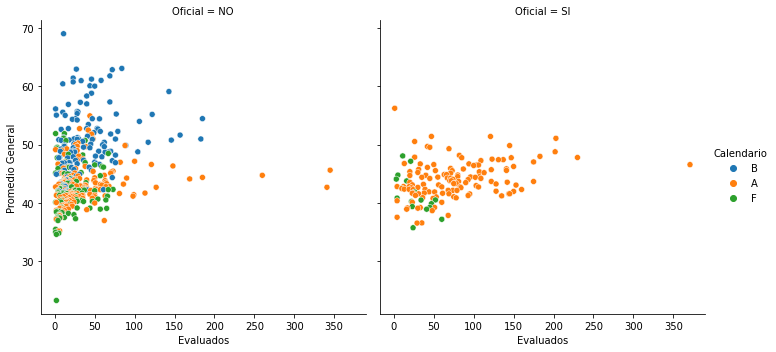

In [ ]:
sns.relplot(
    data=datos_cali, x="Evaluados", y="Promedio General",
    col="Oficial", hue="Calendario",
    kind="scatter"
)

Teniendo en cuenta el gráfico anterior, se observa que para los colegios públicos de Cali no hay colegios registrados con calendario B, la mayoría desarrollan sus actividades en calendario A. También se observa mayor homogeneidad en la distribución del promedio general, lo que quiere decir que gráficamente se observa que el promedio general obtenido por los colegios públicos en Cali no difiere mucho.<BR>
También se observa que para los colegios privados de Cali, hay más dispersión en los datos teniendo en cuenta el promedio general alcanzado por cada colegio. Se observa que el promedio más alto lo obtuvo un colegio de calendario B, mientras que el promedio general más bajo lo obtuvo un colegio de calendario F (colegios donde no se maneja un calendario académico sino que el trabajo es autónomo). <BR>
A nivel general, se observa que los colegio de calendario B parecen obtener promedios generales más altos que los demás calendarios.

In [ ]:
datos_bog = datos[datos['Municipio']=="Bogotá D.C."]

El siguiente análisis se basó en la información de los colegios de Bogotá D.C.

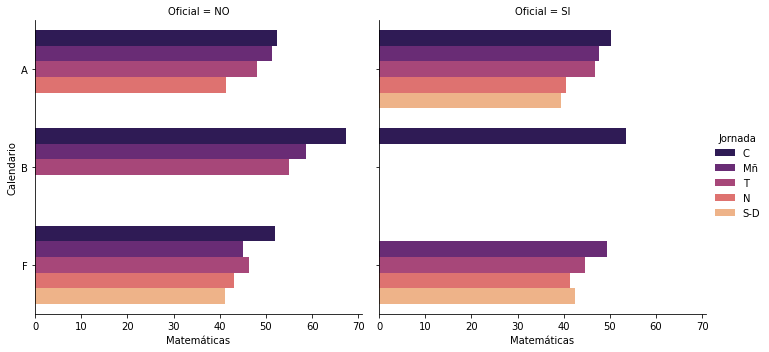

In [ ]:
sns.catplot(data = datos_bog,
            kind = "bar",
            estimator = np.mean,
            x = "Matemáticas",
            y = "Calendario",
            hue = "Jornada",
            col = "Oficial",
            palette = 'magma',
            ci = None)

Se realizó un gráfico de barras para los colegios de Bogotá D.C. teniendo en cuenta si son públicos o no, la jornada y el calendario que manejan para observar los resultados promedios para la sección de matemáticas. <BR>
Se observa para los colegio privados que el promedio de matemáticas más alto lo obtuvieron aquellos colegios de calendario B que estudian la jornada completa, mientras que el promedio más bajo lo obtuvieron los colegios de calendario F que estudian solo los fines de semana y los colegios de calendario A que estudian en la jornada nocturna. <BR>
Para los colegios públicos, se observa que el mayor promedio en matemáticas lo obtuvieron los colegios de calendario B que estudian la jornada completa, mientras que el promedio más bajo fue para los colegios de calendario A que estudian sólo los fines de semana. <BR>
Teniendo en cuenta la jornada en la que estudian, se observa que los mayores promedios para matemáticas los obtienen los colegios de jornada completa, seguidos de los colegios que solo estudian en las mañanas.

In [ ]:
(datos["Colegio"]=="INSTITUTO CORFERRINI").sum()

37

In [ ]:
datos.Colegio.value_counts()

INSTITUTO CORFERRINI                                             37
INSTITUTO TECNICO PARA EL DESARROLLO RURAL IDEAR                 29
INSTITUCION EDUCATIVA SAN JOSE                                   22
INSTITUTO AGRICOLA                                               22
INSTITUTO REGIONAL DE EDUCACION RURAL  - IRER                    20
                                                                 ..
INSTITUCION EDUCATIVA ELEAZAR LIBREROS                            1
INSTITUCION EDUCATIVA DISTRITAL CLEMENCIA HOLGUIN DE URDANETA     1
COLEGIO MARIA DEL SOCORRO                                         1
INSTITUCION EDUCATIVA ROMAN MARIA VALENCIA                        1
INSTITUCION EDUCATIVA LOS ALAMOS                                  1
Name: Colegio, Length: 8887, dtype: int64

In [ ]:
datos.Departamento.value_counts()


Bogotá             1660
Antioquia          1446
Valle              1149
Cundinamarca        916
Santander           648
Atlántico           625
Bolívar             533
Boyacá              501
Tolima              430
Cauca               422
Nariño              403
Cordoba             355
Huila               341
Magdalena           340
Norte Santander     323
Caldas              288
Meta                263
Cesar               254
Sucre               238
Risaralda           231
Quindío             149
La Guajira          147
Casanare            126
Caquetá             123
Choco               117
Putumayo             85
Arauca               71
Guaviare             25
San Andres           18
Amazonas             16
Vaupés               13
Vichada              11
Guainía               6
Name: Departamento, dtype: int64

In [ ]:
datos_m = datos[(datos.Departamento == 'Bogotá') | (datos.Departamento == 'Antioquia')|(datos.Departamento == 'Valle')|(datos.Departamento == 'Cundinamarca')|(datos.Departamento == 'Santander')]
tab1 = pd.crosstab(datos["Jornada"],datos_m["Departamento"]) #TABLA DE CONTINGENCIA 
tab1

Departamento,Antioquia,Bogotá,Cundinamarca,Santander,Valle
Jornada,,,,,
C,549,576,356,229,308
Mñ,366,538,302,232,492
N,166,199,121,87,137
S-D,158,38,87,46,64
T,207,309,50,54,148


Gráfico de calor para departamentos y información de jornada.

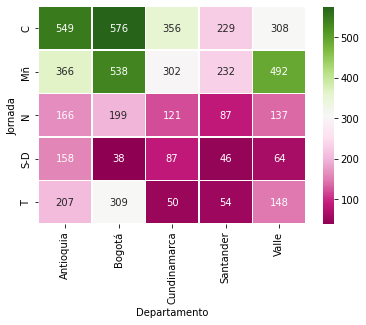

In [ ]:
ax = sns.heatmap(tab1,
                 annot=True, 
                 fmt="d", 
                 linewidths=.5, 
                 cmap="PiYG" 
                 )

En el gráfico anterior se evidencia la información de los primeros cinco departamentos que contiene mayor cantidad de colegios es decir para Bogotá, Antioquia, Valle, Cundinamarca y Santander y la información de las jornadas para estos departamentos. Algunas interpretaciones de estos son que en Antioquia se presentan 549 colegios que tienen jornada completa, para Bogotá hay 579 colegios que tienen jornada completa y tan solo 38 para la jornada sábado-domingo.

Se realizan los gráficos de dispersión teniendo en cuenta las notas alcanzadas en las diferentes áreas: Matemáticas, química, física, biología, filosofía, inglés, lenguaje y sociales.

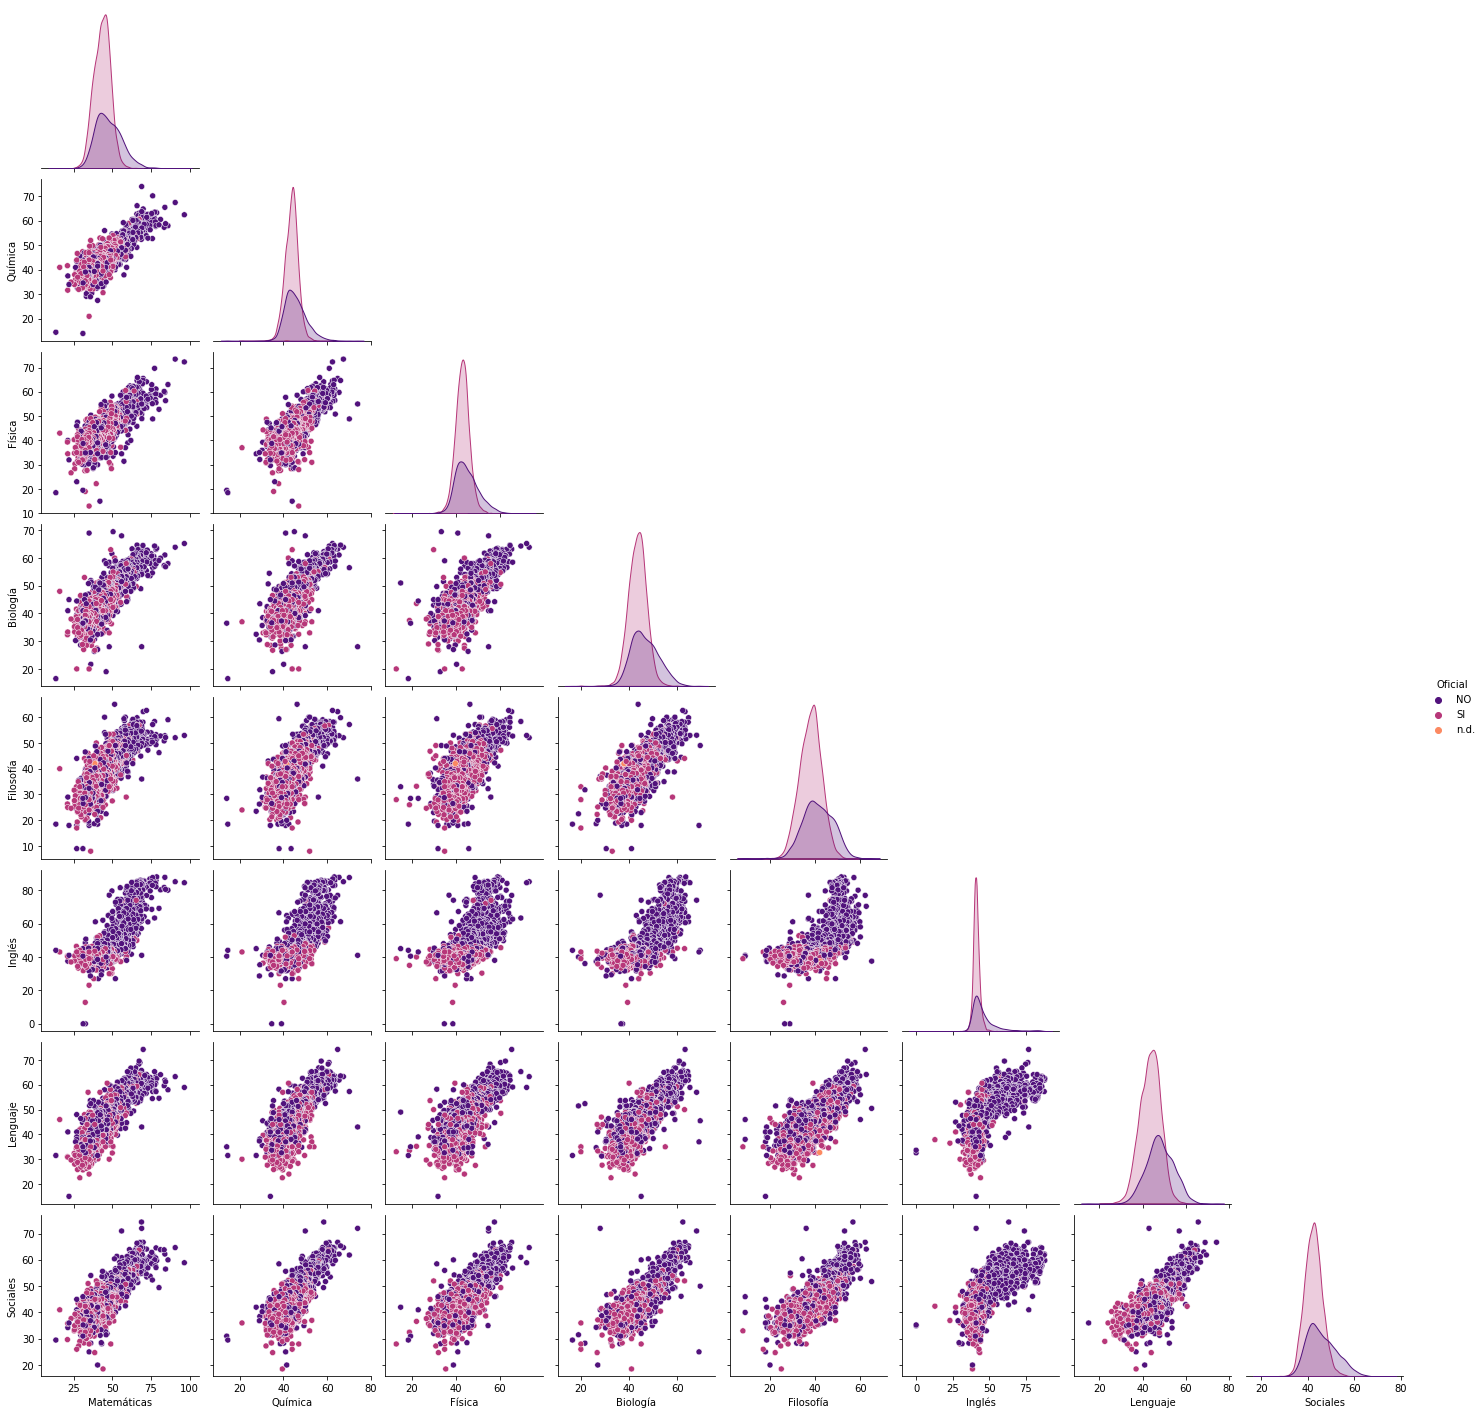

In [ ]:
sns.pairplot(datos.iloc[:,[4,10,11,12,13,14,15,16,17]], corner = True, hue = "Oficial", palette = "magma")

A nivel general se observa que existe una correlación lineal positiva para todas las posibles combinaciones respecto a la nota obtenida por cada colegio en los distintos campos medidos. <BR>
También se observa que los colegios privados obtienen mejores resultados que los colegios públicos.